In [9]:
import numpy as np
from xrdc import xrdutils as xdu
from xrdc import simulation
from xrdc import datasets as xd
from xrdc import simulation as sim
import matplotlib.pyplot as plt

from siamese_xrd import train, datasets, utils
from sklearn.model_selection import train_test_split

def sample_peak_intensity():
    return np.random.uniform()

In [2]:
N = 4000

In [3]:
from importlib import reload
reload(sim)
reload(xdu)

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

In [4]:
# _, Ni_tetra_rsample = Ni_tetra_random(N, .66, 1.5, .66, 1.5)

# Ni_tetra_rsample_y = np.zeros(N)

_, Ni_tetra_rsample = sim.Ni_tetra_random(N, .9, 1.2, .99, 1.01)

Ni_tetra_rsample_y = np.zeros(N)

In [5]:
# _, Ni_cubic_rsample = Ni_cubic_random(N, .66, 1.5)

# Ni_cubic_rsample_y = np.ones(N)

_, Ni_cubic_rsample = sim.Ni_cubic_random(N, .99, 1.01)

Ni_cubic_rsample_y = np.ones(N)

In [32]:
#X = np.log(1 + np.vstack((Ni_tetra_rsample, Ni_cubic_rsample)))
X = np.vstack((Ni_tetra_rsample, Ni_cubic_rsample))

Y = np.hstack((Ni_tetra_rsample_y, Ni_cubic_rsample_y))

#XX, YY = xdu.standardize_input(np.log(1 + X), Y)

In [7]:
XX, YY, _ = xdu.mk_simdata(X, 1, .8, 1.2, xdu.q_grid, y = Y, scale_type = 'scale',\
        q_dim = 150, peak_height = True, q_jitter_magnitude = None)

scale type: scale
q jitter: None
peak height variation True


In [10]:
XXtrain, XXtest, YYtrain, YYtest = train_test_split(XX, YY, train_size = .8)

prefix = 'cubic_tetra_simulated_.9_1.2_3_peakheight_15'
xdu.write_train_test("data/{}/".format(prefix), XXtrain, YYtrain, XXtest, YYtest)

In [14]:
net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix, stats_collector =\
    train.run("siamese-constrastive_1d", "XRD", "data/{}/train/".format(prefix), "data/{}/test".format(prefix), name = prefix,
              n_classes = 2, epochs = 200)

  0%|          | 0/40000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 40000/40000 [07:46<00:00, 85.66it/s, epoch=199, train_loss=0.00946, val_loss=0.00889] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-cubic_tetra_simulated_.9_1.2_3_peakheight_15-*


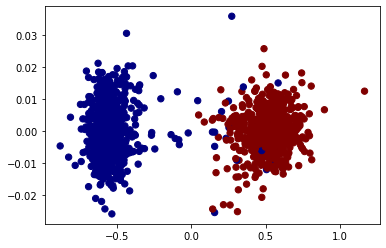

In [31]:
from xrdc import visualization as vis
Xemb, ytrue = utils.get_embedding(net, original_test_loader)

pca, Xpca = vis.do_pca(Xemb)
plt.scatter(*(Xpca.T), c = ytrue, s = 40, cmap = 'jet')

In [71]:
reload(train.networks)

<module 'siamese_xrd.networks' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/siamese_xrd-1.0-py3.7.egg/siamese_xrd/networks.py'>

In [25]:
rm -r ./tmp/siamese-global_pool_1d-XRD-cubic_tetra_simulated_.9_1.2_3_peakheight_15-gif

In [33]:
XX2, YY2, _ = xdu.mk_simdata(X, 1, .8, 1.2, xdu.q_grid, y = Y, scale_type = 'scale',\
        apply_condense=False, peak_height = True, q_jitter_magnitude = None)

scale type: scale
q jitter: None
peak height variation True


In [35]:
XXtrain2, XXtest2, YYtrain2, YYtest2 = train_test_split(XX2, YY2, train_size = .8)

prefix = 'cubic_tetra_simulated_no_agg'
xdu.write_train_test("data/{}/".format(prefix), XXtrain2, YYtrain2, XXtest2, YYtest2)

In [38]:
XXtrain2.shape, YYtrain2.shape, XXtest2.shape, YYtest2.shape


((6400, 800), (6400, 1), (1600, 800), (1600, 1))

In [72]:
net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix, stats_collector =\
    train.run("siamese-global_pool_1d", "XRD", "data/{}/train/".format(prefix), "data/{}/test".format(prefix), name = prefix,
              n_classes = 2, epochs = 200)

  0%|          | 0/40000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


  0%|          | 0/40000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1024x1 and 1024x4)

In [70]:
rm -r ./tmp/siamese-global_pool_1d-XRD-cubic_tetra_simulated_no_agg-gif